<a href="https://colab.research.google.com/github/hyrahmaaa/Submission-MLT-2/blob/main/Proyek_Sistem_Rekomendasi_Rahayu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Sistem Rekomendasi: [Sistem Rekomendasi Film Indonesia Berbasis Data IMDB]
- **Nama:** Rahayu Nur Rahmawati
- **Email:** a229xbm406@devacademy.id
- **ID Dicoding:** A229XBM406


# Business Understanding

**PROBLEM STATEMENT**

Dengan semakin banyaknya pilihan film yang tersedia di berbagai platform streaming dan bioskop, pengguna seringkali kesulitan menemukan film yang sesuai dengan selera mereka. Hal ini dapat menyebabkan:

1. Waktu pencarian yang terbuang: Pengguna menghabiskan waktu terlalu banyak untuk mencari film tanpa hasil yang memuaskan.

2. Konten relevan terlewat: Pengguna melewatkan film-film berkualitas tinggi yang sebenarnya relevan dengan minat mereka.


**GOALS**

Untuk menjawab pertanyaan tersebut dan mengatasi permasalahan yang ada, proyek ini bertujuan untuk:

1. Mempercepat dan mempersonalisasi pencarian: Membangun model machine learning berbasis Content-Based Filtering yang mampu merekomendasikan film kepada pengguna berdasarkan kesamaan fitur film (genre dan aktor), sehingga mempercepat proses penemuan film yang relevan.

2. Meningkatkan penemuan konten relevan: Menganalisis dan memahami karakteristik serta preferensi film dari kumpulan data yang tersedia terutama berdasarkan user_rating untuk memastikan rekomendasi yang diberikan adalah film-film berkualitas tinggi dan sesuai dengan minat pengguna.


**METODOLOGI**

Metodologi Content-Based Filtering Pemilihan Pendekatan: Sistem rekomendasi ini dibangun menggunakan metodologi Content-Based Filtering. Pendekatan ini dipilih karena efektivitasnya dalam merekomendasikan item berdasarkan atribut internalnya (seperti genre dan aktor), yang sangat cocok dengan jenis data film yang tersedia. Basis Rekomendasi: Rekomendasi didasarkan pada kesamaan profil konten antar film. Jika pengguna menyukai Film A, sistem akan mencari dan merekomendasikan Film B yang memiliki karakteristik konten yang serupa. Dalam pengerjaannya tentu akan dilakukan data understanding, data preparation, modelling dan evaluasi.

**METRIK**

Karena sistem rekomendasi content-based ini berfokus pada kesamaan fitur maka metrik evaluasi akan lebih berorientasi pada kualitas rekomendasi dan relevansi. Metrik yang digunakan adalah Top-N Accuracy dimana mengukur proporsi rekomendasi yang relevan di antara N rekomendasi teratas yang diberikan. Namun, ini dapat diukur secara kuantitatif dengan Precision@K.

Tujuan utama dari pengembangan model ini adalah untuk menghasilkan rekomendasi film yang relevan, beragam, dan menarik bagi pengguna, sehingga meningkatkan pengalaman mereka dalam menemukan film.


**DATA**

Pengembangan sistem rekomendasi film ini akan menggunakan dataset dari Kaggle yaitu: IMDB Indonesian Movies (tautan: https://www.kaggle.com/datasets/dionisiusdh/imdb-indonesian-movies). Dataset ini diharapkan mencakup informasi penting mengenai film-film Indonesia seperti:

- 'title' : Judul lengkap dari film, ini identifikasi utama sebuah film.
- 'year' : Tahun rilis film, menunjukkan kapan film tersebut pertama kali dipublikasikan atau ditayangkan.
- 'description' : Ringkasan atau sinopsis cerita film, ini sangat penting untuk content-based filtering karena menjelaskan isi film secara detail.
- 'genre' : Kategori atau jenis film berdasarkan tema, gaya, atau alur cerita.
- 'rating' : Klasifikasi usia penonton atau tingkat kedewasaan konten film. Ini menunjukkan batasan usia minimum yang disarankan untuk menonton film tersebut berdasarkan isi (kekerasan, bahasa, tema dewasa, dll.).
- 'user_rating' : Rata-rata penilaian yang diberikan pengguna (bukan kritikus profesional).
- 'votes' : Jumlah total suara atau penilaian yang berkontribusi pada 'rating' atau 'users rating' sebuah film. Menunjukkan seberapa banyak orang yang telah memberikan penilaian. Semakin tinggi jumlah 'votes', semakin representatif 'rating' tersebut.
- 'languages' : Bahasa utama yang digunakan dalam film.
- 'directors' : Nama sutradara yang mengarahkan film. Sutradara adalah elemen penting dalam identifikasi gaya dan kualitas film.
- 'actors' : Nama-nama aktor/aktris utama yang berperan dalam film. Kehadiran aktor tertentu bisa menjadi daya tarik bagi penonton.
- 'runtime' : Durasi atau lama waktu film dalam satuan menit.

Data ini akan menjadi dasar untuk mengekstrak fitur dan membangun model rekomendasi.

# Data Understanding

Data Understanding adalah tahapan krusial dalam metodologi yang bertujuan untuk mendapatkan pemahaman awal dan mendalam mengenai data yang tersedia, relevansi, kualitas, serta potensi informasi yang terkandung di dalamnya, dalam rangka memecahkan masalah bisnis yang sudah didefinisikan.

Adapun data understanding yang akan dilakukan adalah:

1. Data Loading

2. Exploratory Data Analysis (EDA) pada deskripsi variabel

3. Statistik deskriptif sebelum pre processing

4. Cek missing value

### Data Loading

Data Loading adalah fase awal dalam setiap proyek machine learning di mana dataset mentah yang akan digunakan untuk analisis atau pembangunan model diambil dari sumber asalnya dan dimuat ke dalam lingkungan kerja agar dapat diakses dan diolah lebih lanjut.

Tujuan utama dari tahap ini adalah untuk memastikan data siap untuk diproses pada tahapan selanjutnya seperti Data Preparation.

Import Library yang digunakan

Mengimpor library memungkinkan kita untuk menggunakan fungsi-fungsi canggih yang sudah tersedia.

In [130]:
import pandas as pd
import numpy as np
import ast
import re
import matplotlib.pyplot as plt
import seaborn as sns
import math
from IPython.display import display
from google.colab import drive

Unggah Dataset

Menghubungkan Lingkungan Cloud ke Penyimpanan Awan: drive.mount('/content/gdrive/') adalah perintah spesifik di Google Colab yang berfungsi untuk mengautentikasi dan menghubungkan lingkungan runtime Colab ke akun Google Drive.

In [131]:
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


Setelah sudahh dilakukan drive.mount dan terkoneksi pada akun drive, maka data dapat dimuat dan dgunakan code df.head() untuk menampilkan 5 baris pertama. Hal ini adalah langkah inspeksi awal yang sangat penting.


In [132]:
file_path = '/content/gdrive/MyDrive/LASKAR AI/SUBMISSION/indonesian_movies.csv'
df = pd.read_csv(file_path)
df.head()

,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime
0,#FriendButMarried 2,2020,Ayudia (Mawar De Jongh) is not satisfied enoug...,Biography,13+,6.5,120,Indonesian,Rako Prijanto,"['Adipati Dolken', 'Mawar Eva de Jongh', 'Vonn...",100 min
1,4 Mantan,2020,"Sara, Airin, Rachel, and Amara were accidental...",Thriller,17+,6.4,8,Indonesian,Hanny Saputra,"['Ranty Maria', 'Jeff Smith', 'Melanie Berentz...",80 min
2,Aku Tahu Kapan Kamu Mati,2020,"After apparent death, Siena is able to see sig...",Horror,13+,5.4,17,Indonesian,Hadrah Daeng Ratu,"['Natasha Wilona', 'Ria Ricis', 'Al Ghazali', ...",92 min
3,Anak Garuda,2020,"Good Morning Indonesia, a school for poor orph...",Adventure,13+,9.1,27,Indonesian,Faozan Rizal,"['Tissa Biani Azzahra', 'Violla Georgie', 'Aji...",129 min
4,Dignitate,2020,Alfi (Al Ghazali) meets Alana (Caitlin Halderm...,Drama,17+,7.6,33,Indonesian,Fajar Nugros,"['Al Ghazali', 'Caitlin Halderman', 'Giorgino ...",109 min


Setelah memuat data, penting untuk mengetahui dimensi atau "bentuk" dari dataset tersebut. Hal ini dapat memberikan gambaran seberapa besar dataset yang sedang kita kerjakan.

In [133]:
df.shape

(1272, 11)

Selanjutnya, dapat untuk mengidentifikasi kolom mana yang merupakan label berdasarkan pemahaman masalah bisnis.

In [134]:
# Mendapatkan daftar nama kolom
labels = df.columns.tolist()
labels

['title',
 'year',
 'description',
 'genre',
 'rating',
 'users_rating',
 'votes',
 'languages',
 'directors',
 'actors',
 'runtime']

### Exploratory Data Analysis - Deskripsi Variabel

Exploratory Data Analysis (EDA) adalah tahapan krusial dalam proses machine learning yang menggunakan analisis data yang berfokus pada pemahaman dataset Tujuan utamanya adalah untuk menemukan pola dan apa yang harus dilakukan sebagai contoh disini adalah mengidentifikasi tipe data untuk deksripsi variabel, c dan cek unique code.

Singkatnya, EDA adalah proses "berbicara" dengan data untuk mencari tahu apa yang bisa diceritakan oleh data tersebut. Ini adalah fase di mana seorang analis data atau ilmuwan data bertindak seperti detektif, mencari petunjuk dan wawasan tersembunyi.

Akan dilakukan cek informasi umum termasuk jenis variabel dataset untuk  memastikan tipe data setiap kolom dan jumlah nilai non-null.

In [135]:
# Cek informasi umum termasuk jenis variabel dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1272 non-null   object 
 1   year          1272 non-null   int64  
 2   description   840 non-null    object 
 3   genre         1236 non-null   object 
 4   rating        376 non-null    object 
 5   users_rating  1272 non-null   float64
 6   votes         1272 non-null   object 
 7   languages     1272 non-null   object 
 8   directors     1265 non-null   object 
 9   actors        1272 non-null   object 
 10  runtime       869 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 109.4+ KB


Jika ditinjau jauh, kolom 'votes' dan 'runtime' seharusnya berupa int karena votes adalah jumlah dan runtime ini waktu (terdapat imbuhan min sehingga menjadi object, perlu dihapus). Selain itu, untuk kategori lebih baik 'year' menjadi object dibanding int.

Untuk variabel kategorikal, nunique() memberitahu kita berapa banyak kategori yang berbeda yang ada. Ini penting untuk perencanaan encoding (misalnya, jika terlalu banyak kategori unik, one-hot encoding bisa menghasilkan terlalu banyak kolom).

In [136]:
for column in df.columns:
    print(f"--- Kolom: '{column}' ---")

    # Menghitung jumlah nilai unik
    unique_count = df[column].nunique()
    print(f"Banyak nilai unik: {unique_count}")

    if unique_count <= 50:
        print(f"Nilai unik: {df[column].unique()}\n")
    else:
        print(f"Beberapa contoh nilai unik: {df[column].unique()[:20]}\n")

--- Kolom: 'title' ---
Banyak nilai unik: 1262
Beberapa contoh nilai unik: ['#FriendButMarried 2' '4 Mantan' 'Aku Tahu Kapan Kamu Mati' 'Anak Garuda'
 'Dignitate' 'Guru-Guru Gokil' 'Hunter in the Blue Side of Manchester'
 'Janin' 'Mangkujiwo' 'Mariposa' 'May the Devil Take You: Chapter Two'
 'Milea' 'Nanti Kita Cerita Tentang Hari Ini' 'Nikah Yuk' 'Rasuk 2'
 'Si Doel the Movie 3' 'Surat dari Kematian' 'Temen Kondangan'
 'Titus: Mystery of the Enygma' 'Toko Barang Mantan']

--- Kolom: 'year' ---
Banyak nilai unik: 62
Beberapa contoh nilai unik: [2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007
 2006 2005 2004 2003 2002 2001]

--- Kolom: 'description' ---
Banyak nilai unik: 840
Beberapa contoh nilai unik: ['Ayudia (Mawar De Jongh) is not satisfied enough in enjoying the moment as a wife, but she suddenly becomes pregnant. Her personality changes completely and becomes lazy and super sensitive.'
 'Sara, Airin, Rachel, and Amara were accidentally brought together after

Diperoleh insight:
- Jika 'title' merupakan identitas film seharusnya 1272 unique value semua tetapi ternyata hanya 1262. perlu dicek duplikasinya.
- Jika 'year' memiliki 62 unique value kemungkinan besar tahun nya sangat jauh dari yang terbaru hingga yang terlama.
- Jika 'description' hanya memiliki 820 unique value, kemungkinan terdapat 432 nilai tanpa deskripsi. perlu dicek missing value karena ini penting jika memang tidak ada bisa diganti dengan string kosong ' '. Hal ini agar tidak mempengaruhi isi film.
- Jika 'genre' terdapat kolom berisi nilai nan, maka ini masuk ke dalam missing value sehingga  perlu ditangani bisa diganti string kosong ' ' atau 'unknown genre'.
- Jika 'rating' terdapat kolom berisi nilai nan, maka ini masuk ke dalam missing value sehingga  perlu ditangani bisa diganti string kosong ' ' atau 'unknown'.
- Jika 'actors' memiliki nilai unik 1266 perlu dicek untuk nilai lainnya apakah ada yang kosong atau memang ada yang sama. Selanjutnya, kolom ini kemungkinan besar berisi daftar aktor yang dipisahkan koma dalam format string (seperti terlihat di contoh : ["['Aktor1', 'Aktor2']"]). Oleh karena itu, perlu membersihkan format string ini (menghilangkan [], '', "), memisahkan nama-nama aktor, dan mengolahnya menjadi daftar individu untuk digabungkan ke profil konten.
- Jika 'runtime' terdapat missing value maka  perlu ditangani bisa diganti dengan nilai median.

### Statistik Deskriptif Sebelum Preprocessing

Statistik deskriptif adalah cabang statistik yang berfungsi untuk meringkas dan menggambarkan fitur-fitur utama dari suatu kumpulan data (dataset) secara kuantitatif. Tujuannya bukan untuk membuat kesimpulan tentang populasi yang lebih besar (itu adalah tujuan statistik inferensial), melainkan untuk mendapatkan gambaran jelas mengenai karakteristik data yang sedang dikerjakan.

In [137]:
# Statistik deskriptif
df.describe()

,year,users_rating
count,1272.000000,1272.000000
mean,2007.023585,6.144418
std,12.968560,1.389315
min,1926.000000,1.200000
25%,2006.000000,5.300000
50%,2011.000000,6.400000
75%,2016.000000,7.100000
max,2020.000000,9.400000


Jika diperhatikan, statistik deskriptif ini belum sepenuhnya lengkap karena ada beberapa kolom setelah data preparation yang diubah menjadi numerik.

### Cek Missing Value

Missing values atau nilai hilang adalah data yang tidak tersedia atau tidak tercatat untuk suatu observasi dalam satu atau lebih variabel (kolom). Penanganan missing values adalah langkah krusial dalam tahap Data Preparation nanti dari setiap proyek analisis data atau machine learning.

Oleh karena itu, pada data understanding dapat dieksplor dahulu. Hal ini dilakukan untuk mencegah bias dan kesimpulan yang menyesatkan. Selain itu, ini juga sebagai langkah strategi untuk data preparation nanti.

In [138]:
# Cek missing value dengan fungsi isnull()
df.isnull().sum()

,0
title,0
year,0
description,432
genre,36
rating,896
users_rating,0
votes,0
languages,0
directors,7
actors,0


Untuk 'description' dan 'genre', penanganan NaN dengan string kosong adalah langkah yang tepat karena mereka akan digunakan untuk text vectorization. Bisa diganti dengan string kosong atau keterangan.

Untuk 'rating', bisa diganti dengan string kosong atau keterangan.

Untuk 'runtime' bisa diganti dengan nilai mediannya.

# Data Preparation

Data Preparation adalah tahapan fundamental dan seringkali paling memakan waktu dalam metodologi proyek, di mana data mentah ditransformasi dan dibersihkan menjadi format yang sesuai dan berkualitas tinggi untuk tujuan analisis atau pemodelan machine learning.

Adapun yang dilakukan yaitu:

1. Mengubah tipe data yang benar

2. Statistik deskriptif setelah preprocessing

3. Metode weight untuk votes

4. Menangani missing value

5. Menangani duplikasi

6. Menangani kolom actors

7. Univariate Analysis

8. Multivariate Analysis

9. TD-IDF Vectorized berdasarkan genre

10. TD-IDF Vectorized berdasarkan actors

### Mengubah Tipe Data yang Benar

 Mengubah tipe data adalah langkah fundamental dalam persiapan data yang memastikan bahwa data  siap untuk analisis yang akurat, pemodelan yang efektif, dan penggunaan sumber daya yang efisien. Mengabaikannya dapat menyebabkan bug yang sulit dideteksi, hasil analisis yang salah, dan performa model yang buruk.

In [139]:
df['votes'] = df['votes'].astype(str)
df['votes'] = pd.to_numeric(df['votes'].str.replace(',', ''), errors='coerce')
df['votes'] = df['votes'].fillna(0).astype(int)

df['runtime'] = df['runtime'].fillna('').astype(str)
df['runtime'] = df['runtime'].astype(str).str.replace(' min', '', regex=False)
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')
df['runtime'] = df['runtime'].fillna(0).astype(int)

df['year'] = df['year'].astype(str)

In [140]:
# Cek informasi umum termasuk jenis variabel dataset
df.dtypes

,0
title,object
year,object
description,object
genre,object
rating,object
users_rating,float64
votes,int64
languages,object
directors,object
actors,object


### Statistik Deskriptif Setelah Preprocessing

Tujuannya masih sama untuk melihat karakteristik data tapi setelah preprocessing (setelah tipe data diperbaiki) akan menghasilkan info yang lebih valid dan berguna.

In [141]:
# Statistik deskriptif
df.describe()

,users_rating,votes,runtime
count,1272.000000,1272.000000,1272.000000
mean,6.144418,459.427673,66.315252
std,1.389315,6288.883170,47.101265
min,1.200000,5.000000,0.000000
25%,5.300000,12.000000,0.000000
50%,6.400000,27.000000,89.000000
75%,7.100000,76.000000,100.000000
max,9.400000,187222.000000,262.000000


Insight:
- Imputasi runtime: Pertimbangkan lagi untuk mengganti nilai 0 di runtime (yang berasal dari missing values) dengan median dari kolom runtime (sekitar 89 menit) atau nilai yang lebih realistis. Ini akan membuat fitur runtime lebih bermakna.
- Penanganan votes: Karena distribusi votes sangat skewed, saat menggunakan votes untuk mengurutkan atau menilai kualitas film, pertimbangkan untuk menggunakan log transformasi atau metrik seperti Weighted Rating untuk menstabilkan pengaruh film dengan votes sangat tinggi.
- Analisis Outlier: Mungkin ada baiknya melihat film-film dengan year yang sangat tua, users_rating sangat rendah/tinggi, atau votes sangat tinggi untuk memahami karakteristiknya lebih lanjut.

### Metode Weight untuk Votes

Tujuan utama dari metode weight pada kolom votes adalah untuk menciptakan metrik rating yang lebih andal, yang mempertimbangkan tidak hanya seberapa bagus ratingnya, tetapi juga seberapa banyak orang yang memberikan rating tersebut. Hal ini dikarenakan jumlah votes sangat ekstrem ada yang tinggi ada yang rendah sehingga perlu dilakukan analisis dengan weight.

In [142]:
# Hitung C (rata-rata rating dari semua film dalam dataset). C adalah mean() dari kolom 'users_rating'
C = df['users_rating'].mean()
print(f"Rata-rata users_rating keseluruhan dataset (C): {C:.2f}")

# 2. Tentukan m (minimum votes yang diperlukan agar film masuk perhitungan signifikan)
m = df['votes'].quantile(0.75)
print(f"Ambang batas minimum votes (m, quantile 0.75): {int(m)} votes")

# 3. Definisikan fungsi untuk menghitung Weighted Rating
def calculate_weighted_rating(row, C, m):
    v = row['votes']        # v = jumlah votes untuk film tersebut
    R = row['users_rating'] # R = users_rating (rata-rata rating) untuk film tersebut

    # Formula Weighted Rating: (v / (v + m)) * R + (m / (v + m)) * C
    # Kita tambahkan penanganan kasus v + m = 0 meskipun jarang jika m > 0
    if (v + m) == 0:
        return C
    return (v / (v + m)) * R + (m / (v + m)) * C

# 4. Terapkan fungsi ke setiap baris DataFrame untuk membuat kolom 'weighted_rating' baru
df['weighted_rating'] = df.apply(lambda row: calculate_weighted_rating(row, C, m), axis=1)

print("\nKolom 'weighted_rating' berhasil ditambahkan.")

# Tampilkan beberapa baris untuk membandingkan users_rating, votes, dan weighted_rating
print("\nContoh perbandingan users_rating, votes, dan weighted_rating:")
print(df[['title', 'users_rating', 'votes', 'weighted_rating']].sort_values(by='weighted_rating', ascending=False).head(10))

print("\nDetail statistik untuk 'weighted_rating':")
print(df['weighted_rating'].describe())


Rata-rata users_rating keseluruhan dataset (C): 6.14
Ambang batas minimum votes (m, quantile 0.75): 76 votes

Kolom 'weighted_rating' berhasil ditambahkan.

Contoh perbandingan users_rating, votes, dan weighted_rating:
                                         title  users_rating   votes  \
136                          A Man Called Ahok           8.7    4235   
172   Jelita Sejuba: Mencintai Kesatria Negara           9.1     240   
227                                  Yowis Ben           8.4    3080   
449                                 The Raid 2           8.0  112091   
306                           Cek Toko Sebelah           8.0    1472   
43                              Dua Garis Biru           8.0     763   
22                             27 Steps of May           8.2     280   
1007                      What's Up with Love?           7.8    2445   
403                  Surga Yang Tak Dirindukan           7.8    2135   
855                             Laskar Pelangi           7.8 

In [143]:
df

,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime,weighted_rating
0,#FriendButMarried 2,2020,Ayudia (Mawar De Jongh) is not satisfied enoug...,Biography,13+,6.5,120,Indonesian,Rako Prijanto,"['Adipati Dolken', 'Mawar Eva de Jongh', 'Vonn...",100,6.362121
1,4 Mantan,2020,"Sara, Airin, Rachel, and Amara were accidental...",Thriller,17+,6.4,8,Indonesian,Hanny Saputra,"['Ranty Maria', 'Jeff Smith', 'Melanie Berentz...",80,6.168759
2,Aku Tahu Kapan Kamu Mati,2020,"After apparent death, Siena is able to see sig...",Horror,13+,5.4,17,Indonesian,Hadrah Daeng Ratu,"['Natasha Wilona', 'Ria Ricis', 'Al Ghazali', ...",92,6.008342
3,Anak Garuda,2020,"Good Morning Indonesia, a school for poor orph...",Adventure,13+,9.1,27,Indonesian,Faozan Rizal,"['Tissa Biani Azzahra', 'Violla Georgie', 'Aji...",129,6.919182
4,Dignitate,2020,Alfi (Al Ghazali) meets Alana (Caitlin Halderm...,Drama,17+,7.6,33,Indonesian,Fajar Nugros,"['Al Ghazali', 'Caitlin Halderman', 'Giorgino ...",109,6.585099
...,...,...,...,...,...,...,...,...,...,...,...,...
1267,The Tiger from Tjampa,1953,"Set in the 1930s, and narrated like a ballad f...",Drama,NaN,6.4,30,Indonesian,D. Djajakusuma,"['Wahid Chan', 'Bambang Hermanto', 'R.D. Ismai...",97,6.216753
1268,Enam Djam di Djogja,1951,Depicting the celebrated recapture of the town...,Drama,NaN,6.3,9,Indonesian,Usmar Ismail,"['R.D. Ismail', 'Del Juzar', 'Aedy Moward', 'A...",116,6.160892
1269,Darah dan Doa,1950,It tells the story of an Indonesian revolution...,Drama,NaN,6.6,27,Indonesian,Usmar Ismail,"['Ella Bergen', 'Faridah', 'R.D. Ismail', 'Del...",150,6.263843
1270,Resia Boroboedoer,1928,NaN,Adventure,NaN,7.0,8,Indonesian,NaN,"['Olive Young', nan, nan, nan, nan, nan, nan, ...",0,6.225902


Skor kualitas film yang dihitung menggunakan formula 'Weighted Rating' (mirip dengan IMDb), yang mempertimbangkan users_rating dan jumlah votes untuk memberikan penilaian yang lebih kredibel dan stabil. Film dengan rating tinggi dari sedikit votes akan "ditarik" mendekati rata-rata global, sementara film dengan rating tinggi dari banyak votes akan mempertahankan ratingnya.

### Menangani Missing Value

Tujuannya adalah agar data siap untuk analisis yang valid dan model yang performanya optimal, tanpa adanya gangguan atau bias yang disebabkan oleh informasi yang hilang.

In [144]:
df['description'] = df['description'].fillna('')

In [145]:
df['genre'] = df['genre'].fillna('Unknown Genre')

In [146]:
df['directors'] = df['directors'].fillna('Unknown Directors')

In [147]:
df['rating'] = df['rating'].fillna('Unknown')

In [148]:
df['runtime'] = df['runtime'].replace(0, np.nan)
runtime_median = df['runtime'].median()
df['runtime'] = df['runtime'].fillna(runtime_median).astype(int)

In [149]:
# Cek missing value dengan fungsi isnull()
df.isnull().sum()

,0
title,0
year,0
description,0
genre,0
rating,0
users_rating,0
votes,0
languages,0
directors,0
actors,0


### Menangani Duplikasi

Duplikasi data terjadi ketika ada baris atau entri data yang sama persis atau sangat mirip yang muncul lebih dari satu kali dalam sebuah dataset. Penanganan duplikasi adalah langkah penting dalam tahap Data Preparation (Persiapan Data).

Tujuan utamanya adalah memastikan keunikan dan integritas data. Adapun dalam data ini, title adalah kolom unique tetapi ada judul yang ditulis duplikat dengan tahun berbeda (indikare series atau remake) sehingga untuk mencegah ambigu diberikan tambahan identitas tahun setelah title.

In [150]:
print("\n--- Penanganan Duplikasi Data ---")

# 1. Cek jumlah duplikasi berdasarkan semua kolom
initial_duplicates_all_cols = df.duplicated().sum()
print(f"Jumlah baris duplikat (semua kolom): {initial_duplicates_all_cols}")

if initial_duplicates_all_cols > 0:
    print("Menghapus duplikasi berdasarkan semua kolom...")
    df.drop_duplicates(inplace=True)
    print(f"Jumlah baris setelah menghapus duplikasi (semua kolom): {len(df)}")
else:
    print("Tidak ada duplikasi baris berdasarkan semua kolom.")

# 2. Cek duplikasi berdasarkan kolom 'title' saja
duplicates_by_title = df.duplicated(subset=['title']).sum()
print(f"\nJumlah baris duplikat (berdasarkan kolom 'title' saja): {duplicates_by_title}")

if duplicates_by_title > 0:
    print("Berikut adalah contoh duplikasi berdasarkan 'title' sebelum dihapus:")
    # Menampilkan duplikat tanpa menghapusnya terlebih dahulu
    duplicated_titles_df = df[df.duplicated(subset=['title'], keep=False)].sort_values(by='title')
    print(duplicated_titles_df)

    print("\nMenghapus duplikasi berdasarkan 'title', mempertahankan entri pertama...")
    df.drop_duplicates(subset=['title'], keep='first', inplace=True)
    print(f"Jumlah baris setelah menghapus duplikasi (berdasarkan 'title' saja): {len(df)}")
else:
    print("Tidak ada duplikasi berdasarkan kolom 'title' saja.")


print("\n--- Proses Duplikasi Selesai ---")
print(f"Jumlah total film setelah penanganan duplikasi: {len(df)}")


--- Penanganan Duplikasi Data ---
Jumlah baris duplikat (semua kolom): 0
Tidak ada duplikasi baris berdasarkan semua kolom.

Jumlah baris duplikat (berdasarkan kolom 'title' saja): 10
Berikut adalah contoh duplikasi berdasarkan 'title' sebelum dihapus:
                        title  year  \
1113                    Arini  1987   
140                     Arini  2018   
1237      Badai Pasti Berlalu  1977   
897       Badai Pasti Berlalu  2007   
898       Beranak dalam Kubur  2007   
1253      Beranak dalam Kubur  1972   
249                    Jomblo  2017   
946                    Jomblo  2006   
908              Kuntilanak 2  2007   
66               Kuntilanak 2  2019   
916        Malam Jumat Kliwon  2007   
1137       Malam Jumat Kliwon  1986   
1212          Ratu Ilmu Hitam  1981   
96            Ratu Ilmu Hitam  2019   
722             Roman Picisan  2010   
1221            Roman Picisan  1980   
1251  Si Manis Jembatan Ancol  1973   
111   Si Manis Jembatan Ancol  2019   
651  

In [151]:
print("Membuat kolom 'unique_title' dengan format 'Judul (Tahun)'...\n")

# Menggabungkan kolom 'title' dan 'year' untuk membuat identifier unik
df['unique_title'] = df['title'] + ' (' + df['year'].astype(str) + ')'

print("Kolom 'unique_title' berhasil dibuat.")

# Cek apakah ada duplikasi di kolom 'unique_title' (seharusnya tidak ada jika title dan year unik)
duplicates_in_unique_title = df.duplicated(subset=['unique_title']).sum()
print(f"Jumlah duplikasi berdasarkan 'unique_title': {duplicates_in_unique_title}")

print("\nContoh beberapa film dengan 'unique_title':")
print(df[['title', 'year', 'unique_title']].head(10))

print("\nContoh film yang sebelumnya duplikat berdasarkan judul, sekarang unik:")
# Filter film-film yang sebelumnya kita tahu duplikat dari output Anda
sample_titles = ['Arini','Badai Pasti Berlalu','Beranak dalam Kubur','Jomblo',
                 'Kuntilanak 2','Malam Jumat Kiwon','Ratu Ilmu Hitam','Roman Picisan',
                 'Si Manis Jembatan Ancol','Surat Kecil Untuk Tuhan']
print(df[df['title'].isin(sample_titles)][['title', 'year', 'unique_title']].sort_values(by='title'))

Membuat kolom 'unique_title' dengan format 'Judul (Tahun)'...

Kolom 'unique_title' berhasil dibuat.
Jumlah duplikasi berdasarkan 'unique_title': 0

Contoh beberapa film dengan 'unique_title':
                                   title  year  \
0                    #FriendButMarried 2  2020   
1                               4 Mantan  2020   
2               Aku Tahu Kapan Kamu Mati  2020   
3                            Anak Garuda  2020   
4                              Dignitate  2020   
5                        Guru-Guru Gokil  2020   
6  Hunter in the Blue Side of Manchester  2020   
7                                  Janin  2020   
8                             Mangkujiwo  2020   
9                               Mariposa  2020   

                                   unique_title  
0                    #FriendButMarried 2 (2020)  
1                               4 Mantan (2020)  
2               Aku Tahu Kapan Kamu Mati (2020)  
3                            Anak Garuda (2020)  
4     

In [152]:
# Mendapatkan daftar nama kolom
labels = df.columns.tolist()
labels

['title',
 'year',
 'description',
 'genre',
 'rating',
 'users_rating',
 'votes',
 'languages',
 'directors',
 'actors',
 'runtime',
 'weighted_rating',
 'unique_title']

In [153]:
df['title'] = df['unique_title']
df.drop('unique_title', axis=1, inplace=True)

In [154]:
# Mendapatkan daftar nama kolom
labels = df.columns.tolist()
labels

['title',
 'year',
 'description',
 'genre',
 'rating',
 'users_rating',
 'votes',
 'languages',
 'directors',
 'actors',
 'runtime',
 'weighted_rating']

### Menangani Kolom Actors

Kode ini mendefinisikan sebuah fungsi bernama final_clean_text_column_corrected yang dirancang untuk membersihkan dan memproses string teks, khususnya untuk kolom yang berisi daftar nama (seperti aktor) yang dipisahkan koma. Fungsi ini menghilangkan karakter yang tidak diinginkan, memecah string menjadi item-item individual, kemudian membersihkan setiap item (menghilangkan spasi ekstra, mengubah ke lowercase, dan mengganti spasi dengan underscore), serta menyaring item kosong, lalu mengembalikan hasilnya sebagai daftar (list). Fungsi ini kemudian diterapkan ke setiap baris pada kolom actors dalam DataFrame df untuk mengubah format data aktor menjadi daftar nama aktor yang sudah bersih dan terstandardisasi, siap untuk analisis lebih lanjut seperti penghitungan frekuensi atau analisis jaringan.

In [155]:
def final_clean_text_column_corrected(text):
    if pd.isna(text) or str(text).strip() == '':
        return []
    s = str(text).strip()
    s = re.sub(r"\[|\]|\'|\"|", "", s)
    s = re.sub(r"[^\w\s,]", "", s)
    s = re.sub(r'\s+', ' ', s).strip()

    items = s.split(',')

    cleaned_items = []
    for item in items:
        processed_item = item.strip().lower().replace(' ', '_')
        processed_item = processed_item.strip('_') #

        if processed_item:
            cleaned_items.append(processed_item)
    return cleaned_items

df['actors'] = df['actors'].apply(final_clean_text_column_corrected)
print(f"Tipe data dari elemen pertama di df['actors']: {type(df['actors'].iloc[0])}")
print("Contoh 5 baris pertama df['actors'] setelah diproses:")
print(df['actors'].head())

Tipe data dari elemen pertama di df['actors']: <class 'list'>
Contoh 5 baris pertama df['actors'] setelah diproses:
0    [adipati_dolken, mawar_eva_de_jongh, vonny_cor...
1    [ranty_maria, jeff_smith, melanie_berentz, den...
2    [natasha_wilona, ria_ricis, al_ghazali, fitria...
3    [tissa_biani_azzahra, violla_georgie, ajil_dit...
4    [al_ghazali, caitlin_halderman, giorgino_abrah...
Name: actors, dtype: object


In [156]:
# Mendapatkan daftar nama kolom
labels = df.columns.tolist()
labels

['title',
 'year',
 'description',
 'genre',
 'rating',
 'users_rating',
 'votes',
 'languages',
 'directors',
 'actors',
 'runtime',
 'weighted_rating']

### Univariate Analysis

Analisis Univariate adalah jenis analisis statistik yang hanya melibatkan satu variabel (kolom data) pada satu waktu. Tujuan utamanya adalah untuk menggambarkan dan meringkas karakteristik data dari variabel tunggal tersebut.

In [157]:
# Daftar Kolom Numerik
numerical_cols = [
    'users_rating',
    'votes',
    'runtime',
    'weighted_rating'
]

# Daftar Kolom Kategorikal (termasuk teks bebas)
categorical_cols = [
    'title',
    'year',
    'description',
    'genre',
    'rating',
    'languages',
    'directors',
    'actors'
]

print("Kolom Numerik:", numerical_cols)
print("Kolom Kategorikal:", categorical_cols)

Kolom Numerik: ['users_rating', 'votes', 'runtime', 'weighted_rating']
Kolom Kategorikal: ['title', 'year', 'description', 'genre', 'rating', 'languages', 'directors', 'actors']


Berikut adalah histogram dari variabel numerik:

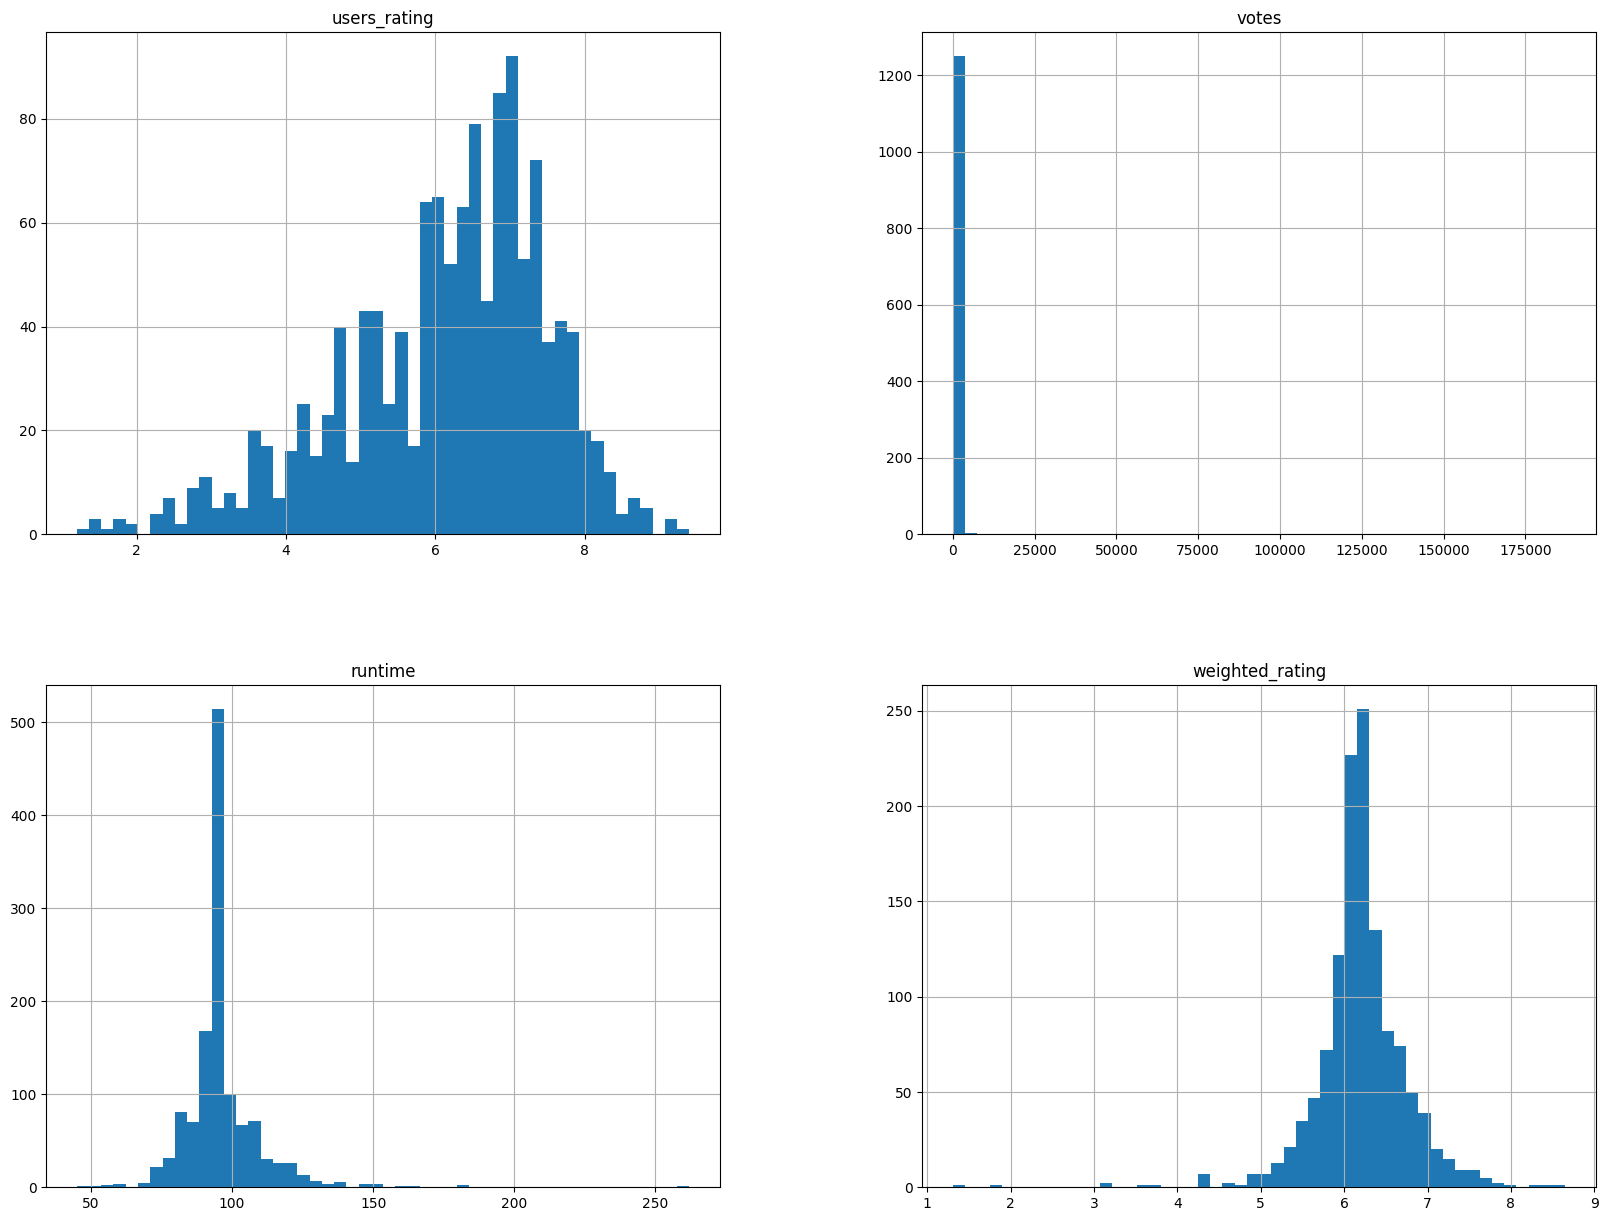

In [158]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Kolom yang lain cenderung berdistribusi normal. Namun untuk kolom 'votes' histogramnya adalah yang paling mencolok karena menunjukkan distribusi yang sangat ekstrem (highly skewed). Mayoritas film memiliki jumlah votes yang sangat sedikit (terkonsentrasi di dekat 0), sementara hanya segelintir film yang memiliki votes puluhan hingga ratusan ribu.

Berikut adalah diagram batang untuk variabel kategorikal:

<ipython-input-159-2506d42dfec8>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.index, y=plot_data.values, palette='viridis', ax=ax)
<ipython-input-159-2506d42dfec8>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.index, y=plot_data.values, palette='viridis', ax=ax)
<ipython-input-159-2506d42dfec8>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_data.index, y=plot_data.values, palette='viridis', ax=ax)
<ipython-input-159-2506d42dfec8>:36: FutureWarning: 

Passing `palette` without assigning `hue` is depr

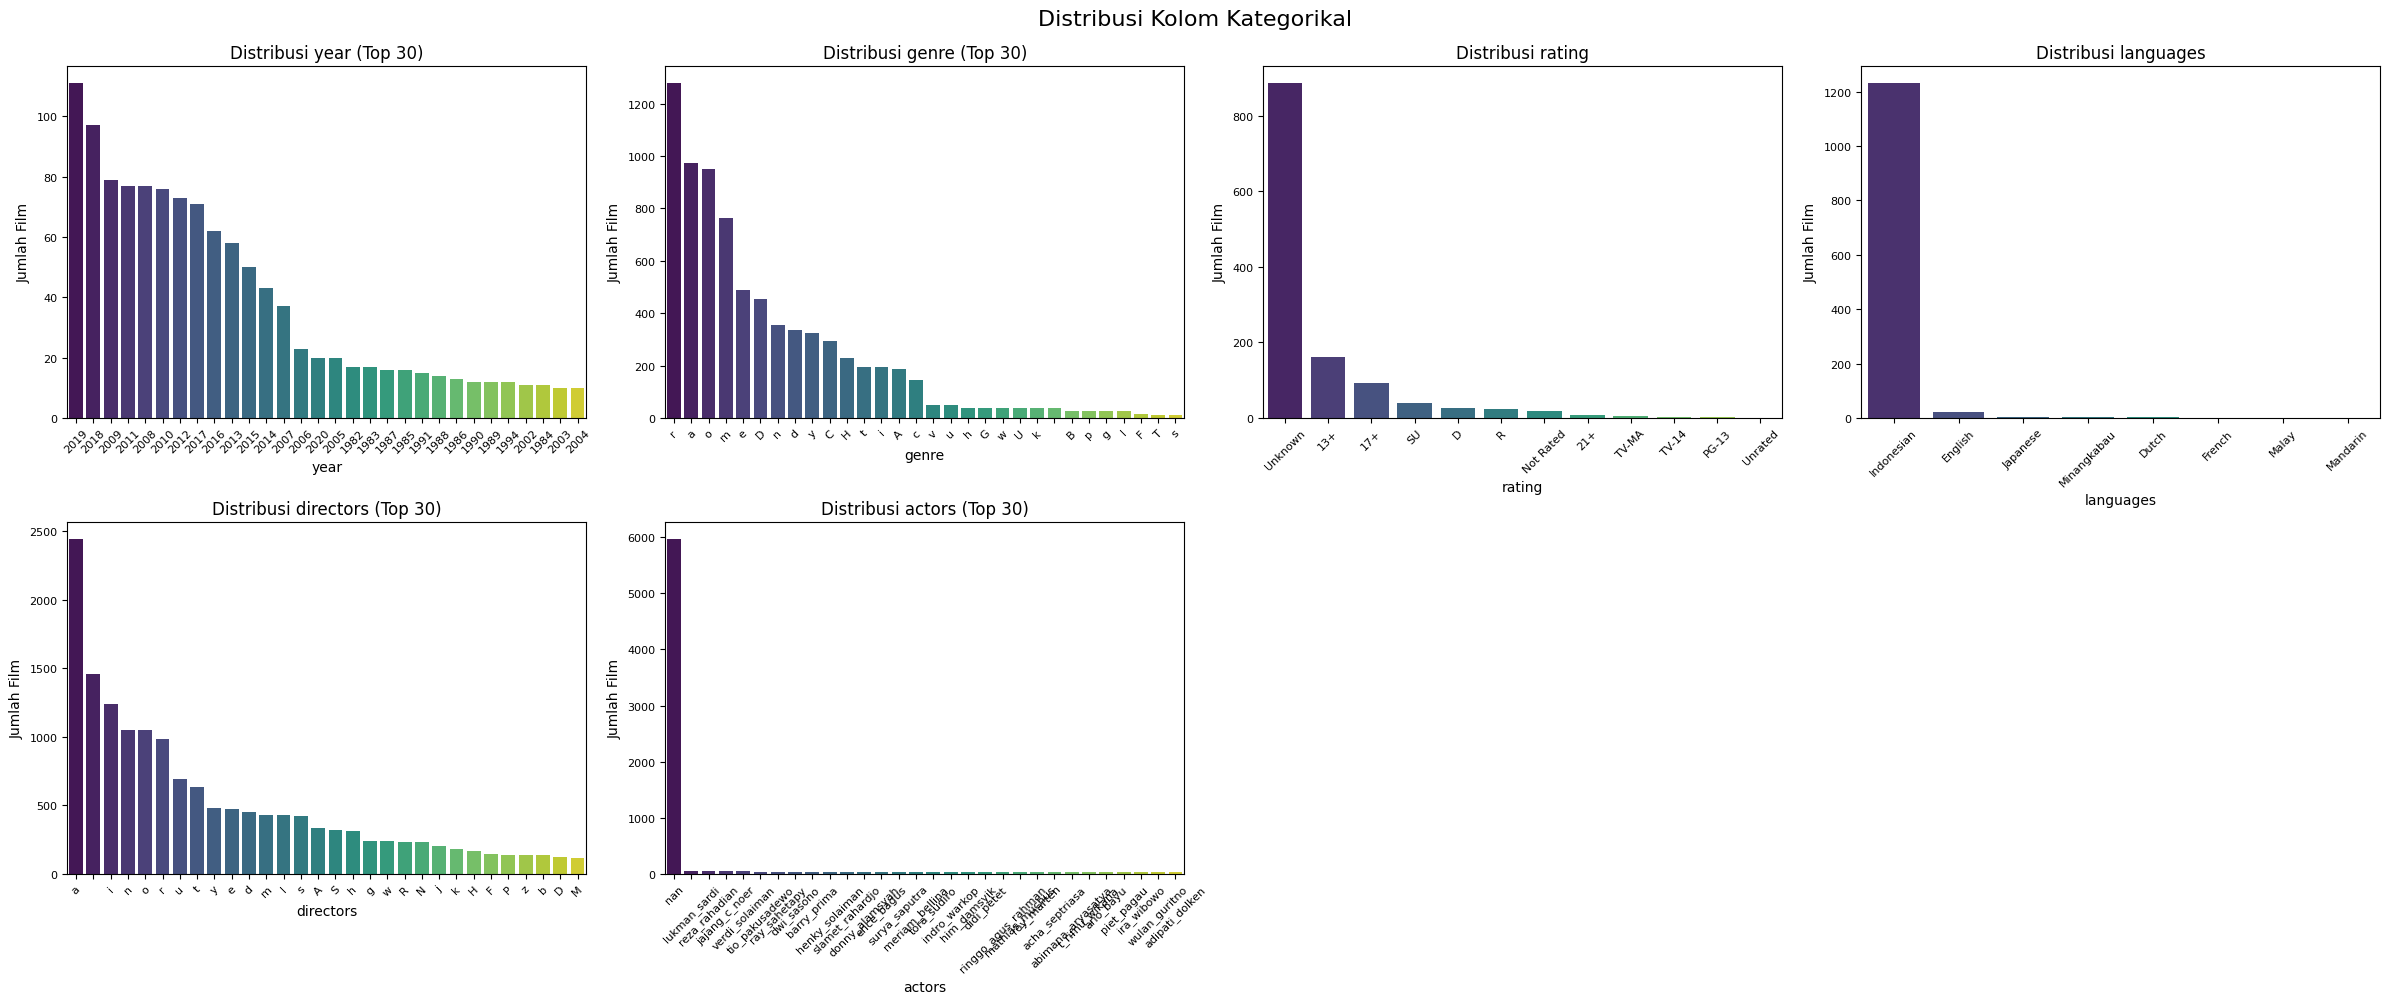


--- Visualisasi Bar Chart Kategorikal Selesai ---
Catatan: Kolom 'title' dan 'description' tidak dibuatkan bar chart karena memiliki terlalu banyak kategori unik.


In [159]:
# Definisi kolom kategorikal yang cocok untuk bar chart
plot_categorical_cols = [
    'year',
    'genre',
    'rating',
    'languages',
    'directors',
    'actors'
]

# Kolom yang akan dilewati dari pembuatan bar chart karena terlalu banyak kategori unik
skip_categorical_cols = ['title', 'description']

# Tentukan layout subplot
n_cols_per_row = 4
n_rows = math.ceil(len(plot_categorical_cols) / n_cols_per_row)
fig, axes = plt.subplots(n_rows, n_cols_per_row, figsize=(n_cols_per_row * 6, n_rows * 5), dpi=100)
axes = axes.flatten()

for i, col in enumerate(plot_categorical_cols):
    ax = axes[i]

    if col in ['genre', 'directors', 'actors']:
        all_items = [item for sublist in df[col].dropna() for item in sublist]
        value_counts_data = pd.Series(all_items).value_counts()
    else:
        value_counts_data = df[col].value_counts()

    if len(value_counts_data) > 30:
        plot_data = value_counts_data.head(30)
        ax.set_title(f'Distribusi {col} (Top 30)', fontsize=12)
    else:
        plot_data = value_counts_data
        ax.set_title(f'Distribusi {col}', fontsize=12)

    sns.barplot(x=plot_data.index, y=plot_data.values, palette='viridis', ax=ax)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Jumlah Film', fontsize=10)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.suptitle('Distribusi Kolom Kategorikal', y=1.00, fontsize=16)
plt.show()

print("\n--- Visualisasi Bar Chart Kategorikal Selesai ---")
print("Catatan: Kolom 'title' dan 'description' tidak dibuatkan bar chart karena memiliki terlalu banyak kategori unik.")

Visualisasi sudah cukup jelas mulai dari 'year' terbanyak 2019, 'rating' terbanyak tidak diketahui, 'languages' terbanyak Indonesian. Namun untuk 'genre','directions' dan actors'diwakili dengan abjad namun dapat menunjukkan visual terbanyak hingga yang sedikit.

### Multivariate Analysis

 Analisis Multivariate adalah jenis analisis statistik yang melibatkan dua atau lebih variabel secara bersamaan untuk mengeksplorasi hubungan, interaksi, atau pola antara variabel-variabel tersebut.

Dilakukan analisis dengan pairplot untuk secara cepat memvisualisasikan hubungan antara setiap pasangan variabel numerik dalam dataset. Ia akan menampilkan scatter plot untuk setiap pasangan variabel yang berbeda, dan histogram atau kernel density estimate (KDE) untuk distribusi setiap variabel tunggal pada diagonalnya.

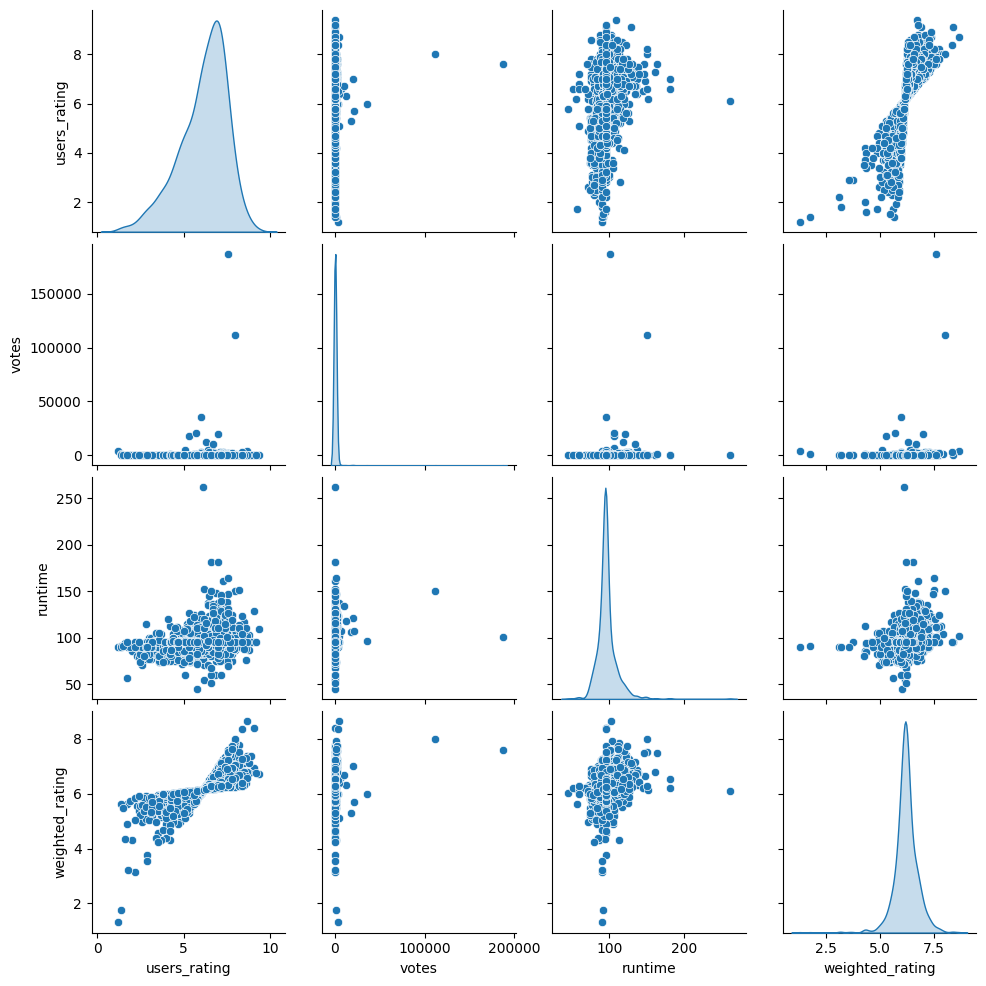

In [160]:
sns.pairplot(df, diag_kind = 'kde')

Selanjutnya adalah correlation matrix yaitu untuk menyajikan koefisien korelasi antara setiap pasangan variabel numerik dalam dataset dalam bentuk tabel. Setiap sel dalam matriks menunjukkan kekuatan dan arah hubungan linier antara dua variabel.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

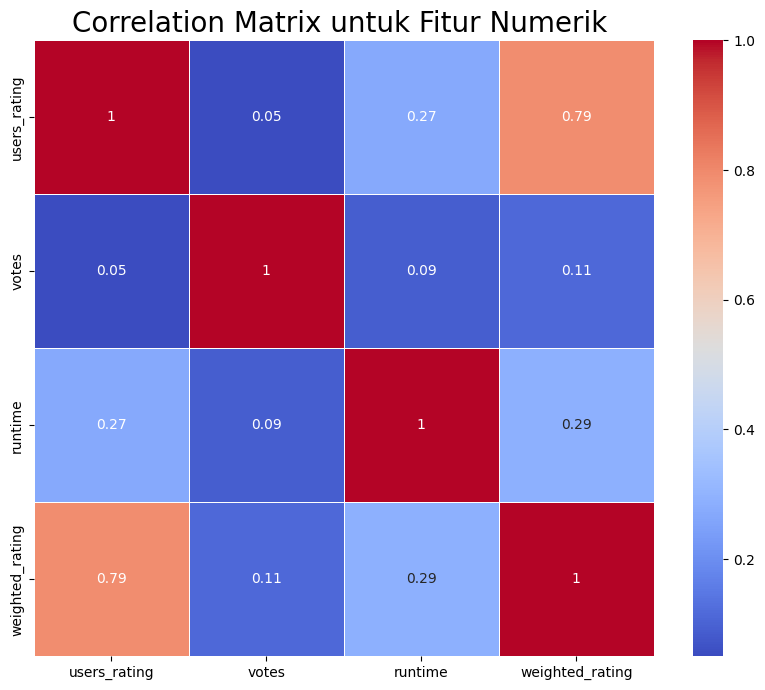

In [161]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, ) # Changed df to data
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

 Box plot memberikan gambaran cepat tentang pusat, sebaran, dan potensi adanya outlier dalam satu atau lebih set data numerik, membuatnya ideal untuk perbandingan distribu

<ipython-input-162-1b888ab9b72a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], ax=axes[i], palette='viridis')
<ipython-input-162-1b888ab9b72a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], ax=axes[i], palette='viridis')
<ipython-input-162-1b888ab9b72a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], ax=axes[i], palette='viridis')
<ipython-input-162-1b888ab9b72a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hu

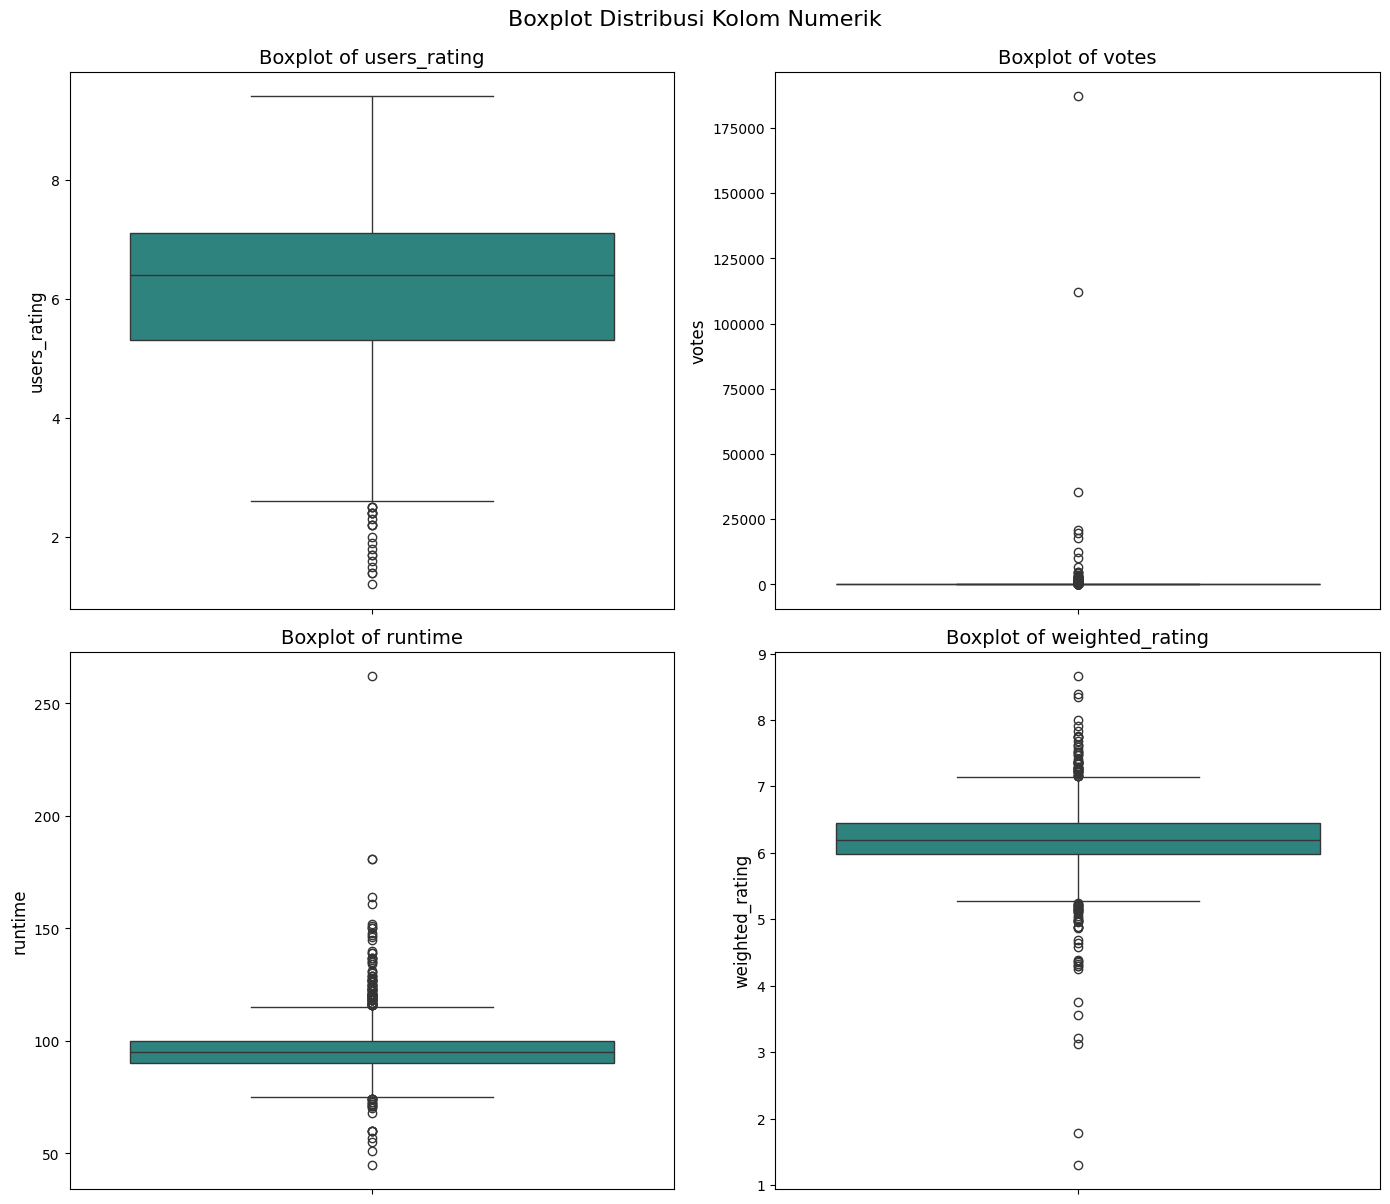

In [162]:
# Tentukan layout subplot (misal, 2 kolom per baris)
n_cols_per_row = 2
n_rows = math.ceil(len(numerical_cols) / n_cols_per_row)

fig, axes = plt.subplots(n_rows, n_cols_per_row, figsize=(n_cols_per_row * 7, n_rows * 6), dpi=100)
axes = axes.flatten() # Meratakan array axes untuk iterasi mudah

# Iterasi melalui kolom-kolom numerik dan gambar boxplot
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i], palette='viridis')
    axes[i].set_title(f'Boxplot of {col}', fontsize=14)
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].tick_params(axis='y', labelsize=10) # Atur ukuran label Y axis

# Sembunyikan subplot yang tidak terpakai jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.98]) # Menyesuaikan layout
plt.suptitle('Boxplot Distribusi Kolom Numerik', y=1.00, fontsize=16) # Judul utama
plt.show()

### TF-IDF Vectorizer berdasarkan Genre

Untuk mengukur seberapa penting sebuah kata (term) dalam suatu dokumen, relatif terhadap koleksi (corpus) dokumen lainnya.

Berdasarkan pertimbangan pada analisis sebelumnya, akan dilakukan sistem rekomendasi dengan 3 kolom saja yaitu title, genre, dan weighted_rating.

In [163]:
df_new = df[['title','genre','weighted_rating']]
df_new

,title,genre,weighted_rating
0,#FriendButMarried 2 (2020),Biography,6.362121
1,4 Mantan (2020),Thriller,6.168759
2,Aku Tahu Kapan Kamu Mati (2020),Horror,6.008342
3,Anak Garuda (2020),Adventure,6.919182
4,Dignitate (2020),Drama,6.585099
...,...,...,...
1267,The Tiger from Tjampa (1953),Drama,6.216753
1268,Enam Djam di Djogja (1951),Drama,6.160892
1269,Darah dan Doa (1950),Drama,6.263843
1270,Resia Boroboedoer (1928),Adventure,6.225902


In [164]:
print("Jumlah data title adalah ", len(df_new.title.unique()))
print("Jumlah data genre adalah ", len(df_new.genre.unique()))
print("Jumlah data weighted_rating adalah ", len(df_new.weighted_rating.unique()))

Jumlah data title adalah  1262
Jumlah data genre adalah  16
Jumlah data weighted_rating adalah  1040


In [165]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Melakukan perhitungan idf pada data teks
tfidf_matrix = tfidf_vectorizer.fit_transform(df_new['genre'])

# Mendapatkan daftar kata kunci (fitur) yang dihasilkan
feature_names = tfidf_vectorizer.get_feature_names_out()

print(feature_names)

['action' 'adventure' 'animation' 'biography' 'comedy' 'crime' 'drama'
 'family' 'fantasy' 'fi' 'genre' 'history' 'horror' 'romance' 'sci'
 'thriller' 'unknown' 'war']


In [166]:
# Melakukan fit lalu ditransformasikan ke bentuk matriks
tfidf_matrix = tfidf_vectorizer.fit_transform(df_new['genre'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(1262, 18)

In [167]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [168]:
# Membuat dataframe untuk melihat tf-idf matrix

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfidf_vectorizer.get_feature_names_out(),
    index=df_new.title
).sample(18, axis=1).sample(10, axis=0)

,adventure,unknown,biography,sci,history,fantasy,comedy,family,horror,genre,drama,war,romance,animation,crime,action,thriller,fi
title,,,,,,,,,,,,,,,,,,
Wewe (2015),0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Menebus Impian (2010),0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lovely Man (2011),0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bukan Bintang Biasa (2007),0.0,0.707107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ketika Cinta Bertasbih (2009),0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dalam Mihrab Cinta (2010),0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Laundry Show (2019),0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mafia Insyaf (2010),0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
My Stupid Boss (2016),0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### TF-IDF Vectorizer berdasarkan Actors

Untuk mengukur seberapa penting sebuah kata (term) dalam suatu dokumen, relatif terhadap koleksi (corpus) dokumen lainnya.

Berdasarkan pertimbangan pada analisis sebelumnya, akan dilakukan sistem rekomendasi dengan 3 kolom saja yaitu title, genre, dan weighted_rating.

In [169]:
df_new1 = df[['title','actors','weighted_rating']]
df_new1

,title,actors,weighted_rating
0,#FriendButMarried 2 (2020),"[adipati_dolken, mawar_eva_de_jongh, vonny_cor...",6.362121
1,4 Mantan (2020),"[ranty_maria, jeff_smith, melanie_berentz, den...",6.168759
2,Aku Tahu Kapan Kamu Mati (2020),"[natasha_wilona, ria_ricis, al_ghazali, fitria...",6.008342
3,Anak Garuda (2020),"[tissa_biani_azzahra, violla_georgie, ajil_dit...",6.919182
4,Dignitate (2020),"[al_ghazali, caitlin_halderman, giorgino_abrah...",6.585099
...,...,...,...
1267,The Tiger from Tjampa (1953),"[wahid_chan, bambang_hermanto, rd_ismail, mali...",6.216753
1268,Enam Djam di Djogja (1951),"[rd_ismail, del_juzar, aedy_moward, agus_muljo...",6.160892
1269,Darah dan Doa (1950),"[ella_bergen, faridah, rd_ismail, del_juzar, a...",6.263843
1270,Resia Boroboedoer (1928),"[olive_young, nan, nan, nan, nan, nan, nan, na...",6.225902


In [170]:
from sklearn.feature_extraction.text import TfidfVectorizer

df_new1['actors'] = df_new1['actors'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')

# Inisialisasi TfidfVectorizer
tfidf_vectorizer1 = TfidfVectorizer()

# Melakukan perhitungan idf pada data teks
tfidf_matrix1 = tfidf_vectorizer1.fit_transform(df_new1['actors'])

# Mendapatkan daftar kata kunci (fitur) yang dihasilkan
feature_names1 = tfidf_vectorizer1.get_feature_names_out()

print(feature_names1)

['703_ricard' 'a_khalik_noor_nasution' 'a_rachman' ... 'zuzana_chang'
 'zuzanna_kamusinski' 'özge_özpirinçci']


<ipython-input-170-c833321019ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new1['actors'] = df_new1['actors'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')


In [171]:
# Melakukan fit lalu ditransformasikan ke bentuk matriks
tfidf_matrix1 = tfidf_vectorizer1.fit_transform(df_new1['actors'])

# Melihat ukuran matrix tfidf
tfidf_matrix1.shape

(1262, 5060)

In [172]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix1.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.35749005, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [173]:
# Membuat dataframe untuk melihat tf-idf matrix

pd.DataFrame(
    tfidf_matrix1.todense(),
    columns=tfidf_vectorizer1.get_feature_names_out(),
    index=df_new1.title
).sample(18, axis=1).sample(10, axis=0)

,sapri,kanaya_gleadys,mila_karmila,qois_alhaqqi,faza_meonk,ghea_dsyawal,adam_stardust,tsugami_arimura,kelly_tandiono,novi_rahmat_hidayat,shaheila_nafissa,tasya_medina,bryant_santoso,rayn_wijaya,yuanita_christiani,aep_bancet,dias_astiza,kiwil
title,,,,,,,,,,,,,,,,,,
Triangle the Dark Side (2016),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pencet Sana Pencet Sini (1994),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Roy Kiyoshi: The Untold Story (2019),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Intan Berduri (1972),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mereka Yang Tak Terlihat (2017),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Otomatis Romantis (2008),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pocong Rumah Angker (2010),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Taksi (1991),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Puspa Indah Taman Hati (1979),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Modelling Berdasarkan Genre

Dalam content-based filtering, modeling berdasarkan genre berarti sistem rekomendasi menganalisis genre dari konten film yang disukai pengguna untuk mencari film lain yang sama genrenya.

### Cosine Similarity

Untuk mengukur seberapa mirip (atau tidak mirip) arah dua vektor dalam ruang multidimensi.

In [174]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
genre_sim = cosine_similarity(tfidf_matrix)
genre_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [175]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama film
genre_sim_df = pd.DataFrame(genre_sim, index=df_new['title'], columns=df_new['title'])
print('Shape:', genre_sim_df.shape)

# Melihat similarity matrix pada setiap judul
genre_sim_df.sample(10, axis=1).sample(10, axis=0)

Shape: (1262, 1262)


title,The Secret: Suster Ngesot Urban Legend (2018),Catatan Si Boy 3 (1990),Hantu Perawan Jeruk Purut (2008),Kabut Sutra Ungu (1979),Nyi Ageng Ratu Pemikat (1983),My Journey: Mencari Mata Air (2016),Cinta Segi Tiga (1983),Bangkit! (2016),Chrisye (2017),Java Heat (2013)
title,,,,,,,,,,
SMS: Suka Ma Suka (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Reinkarnasi (2000),0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
London Virginia (2010),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Oh Tidak..! (2011),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Selendang Rocker (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hasduk Berpola (2013),0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
Remember When (2014),0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
Pijat Atas Tekan Bawah (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Honeymoon (2013),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###  Berdasarkan Genre

 Kode ini menunjukkan implementasi sederhana dari sistem rekomendasi berbasis konten yang mengidentifikasi film-film serupa berdasarkan kemiripan genre dan menampilkannya kepada pengguna.

In [176]:
def film_recommendations(input_film, similarity_data = genre_sim_df, items = df_new[['title','genre','weighted_rating']], k=5):

    index = similarity_data.loc[:,input_film].to_numpy().argpartition(range(-1,-k,-1))

    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(input_film, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Selanjutnya, dipanggil contoh judul film nya:

In [177]:
df_new[df_new.title.eq('Milea (2020)')]

,title,genre,weighted_rating
11,Milea (2020),Drama,6.110717


Maka akan muncul top-5 berdasarkan genre yang cocok dengan judul title 'Milea(2020)':

In [178]:
film_recommendations('Milea (2020)')

,title,genre,weighted_rating
0,Mata Batin (2017),Drama,5.169935
1,Ruma Maida (2009),Drama,6.397758
2,ILY from 38.000 Ft (2016),Drama,6.058694
3,Sepuluh (2009),Drama,6.071162
4,Virgin 2: Bukan Film Porno (2009),Drama,5.865491


# Modelling Berdasarkan Actors

Dalam content-based filtering, modeling berdasarkan genre berarti sistem rekomendasi menganalisis actors (banyak actor) dari konten film yang disukai pengguna untuk mencari film lain yang sama actornya.

### Cosine Similarity

Untuk mengukur seberapa mirip (atau tidak mirip) arah dua vektor dalam ruang multidimensi.

In [179]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
actor_sim = cosine_similarity(tfidf_matrix1)
actor_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.00592847, ..., 0.05776521, 0.10412252,
        0.09589699],
       [0.        , 0.00592847, 1.        , ..., 0.02730501, 0.04921763,
        0.04532951],
       ...,
       [0.        , 0.05776521, 0.02730501, ..., 1.        , 0.47956172,
        0.44167701],
       [0.        , 0.10412252, 0.04921763, ..., 0.47956172, 1.        ,
        0.79612834],
       [0.        , 0.09589699, 0.04532951, ..., 0.44167701, 0.79612834,
        1.        ]])

In [180]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama film
actor_sim_df = pd.DataFrame(actor_sim, index=df_new1['title'], columns=df_new1['title'])
print('Shape:', actor_sim_df.shape)

# Melihat similarity matrix pada setiap judul
actor_sim_df.sample(10, axis=1).sample(10, axis=0)

Shape: (1262, 1262)


title,12:00 A.M. (2005),Mencari Hilal (2015),Legend of the East (2014),Menebus Impian (2010),Merpati Tak Pernah Ingkar Janji (1985),Not for Sale (2010),Dikejar Setan (2009),Dongkrak Antik (1982),Brandal-Brandal Ciliwung (2012),Cinta/Mati (2013)
title,,,,,,,,,,
November 10th (2015),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Kakak (2015),0.231569,0.289771,0.262454,0.169287,0.055924,0.250828,0.196868,0.115585,0.060433,0.304871
Guru-Guru Gokil (2020),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Terjebak Nostalgia (2016),0.208564,0.260985,0.236381,0.152470,0.050369,0.225910,0.177311,0.104102,0.054429,0.274584
Perjanjian dengan Iblis (2019),0.478272,0.598481,0.542060,0.349639,0.115504,0.518050,0.406604,0.238724,0.124815,0.629668
Kawin Kontrak Lagi (2008),0.081292,0.101724,0.092134,0.059428,0.019632,0.088053,0.069111,0.040576,0.053846,0.107025
"XL: Extra Large - Antara Aku, Kau, dan Mak Erot (2008)",0.135259,0.169255,0.153299,0.098881,0.032665,0.146509,0.114991,0.067513,0.035299,0.178075
Belok Kanan Barcelona (2018),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Melodi Cinta Rhoma Irama (1980),0.406852,0.509110,0.461115,0.297428,0.098256,0.440690,0.345886,0.203075,0.106177,0.535640


###  Berdasarkan Actors

 Kode ini menunjukkan implementasi sederhana dari sistem rekomendasi berbasis konten yang mengidentifikasi film-film serupa berdasarkan kemiripan actors dan menampilkannya kepada pengguna.

Selanjutnya, dipanggil contoh filmnya dan akan keluar hasil film rekomendasinya (5) yang actornya cenderung mirip:

In [181]:
# Pilih satu film input untuk dicari rekomendasinya
film_input_contoh = 'Milea (2020)'

rekomendasi_berbasis_aktor = film_recommendations(
    input_film=film_input_contoh,
    similarity_data=actor_sim_df,
    items=df_new1,
    k=5
)

print(f"Rekomendasi film mirip '{film_input_contoh}' berdasarkan aktor:")
rekomendasi_berbasis_aktor

Rekomendasi film mirip 'Milea (2020)' berdasarkan aktor:


,title,actors,weighted_rating
0,Dilan 1990 (2018),iqbaal_dhiafakhri_ramadhan vanesha_prescilla y...,7.269452
1,Dilan 1991 (2019),iqbaal_dhiafakhri_ramadhan vanesha_prescilla i...,6.556720
2,Uka-Uka the Movie: Nini Tulang (2019),stefhani_zamora_husen yoriko_angeline gusti_ra...,5.961088
3,"R: Raja, Ratu, & Rahasia (2018)",brandon_salim aurora_ribero ira_wibowo dimas_b...,6.536990
4,Lima Elang (2011),david_chalik omara_n_esteghlal junior_liem teu...,6.532623


# Evaluation

### Precision@K berdasarkan genre

In [182]:
def get_main_genre(film_title, df):
    if 'genre' not in df.columns:
         print(f"Error: Kolom 'genre' tidak ditemukan di DataFrame yang dilewatkan.")
         return None

    film_row = df[df['title'] == film_title]


    if film_row.empty:

        return None

    genre_str = film_row['genre'].iloc[0]

    if isinstance(genre_str, list):
        if genre_str:
             return genre_str[0]
        return None
    elif isinstance(genre_str, str):
        first_genre = genre_str.split(',')[0].strip()
        if first_genre:
            return first_genre.lower().replace(' ', '_')
        return None
    return None


def calculate_precision_at_k(input_film, recommendations_df, original_df, k, evaluation_feature):

    input_feature_value = get_main_genre(input_film, original_df)

    if not input_feature_value:
        return 0.0

    relevant_recommendations = 0

    for _, row in recommendations_df.head(k).iterrows():
        recommended_film_title = row['title']
        recommended_feature_value = get_main_genre(recommended_film_title, original_df)

        if recommended_feature_value is not None and recommended_feature_value == input_feature_value:
            relevant_recommendations += 1

    if k == 0:
        return 0.0
    return relevant_recommendations / k

film_saya = 'Milea (2020)'

print(f"\n--- Evaluasi Rekomendasi Berbasis Genre untuk '{film_saya}' ---")

rekomendasi_genre = film_recommendations(film_saya, similarity_data=genre_sim_df, items=df_new, k=5)
print("Rekomendasi Genre:")
print(rekomendasi_genre)


precision_genre = calculate_precision_at_k(film_saya, rekomendasi_genre, df_new, k=5, evaluation_feature='genre')
print(f"Precision@5 (berbasis genre) untuk '{film_saya}': {precision_genre:.2f}")


--- Evaluasi Rekomendasi Berbasis Genre untuk 'Milea (2020)' ---
Rekomendasi Genre:
                               title  genre  weighted_rating
0                  Mata Batin (2017)  Drama         5.169935
1                  Ruma Maida (2009)  Drama         6.397758
2          ILY from 38.000 Ft (2016)  Drama         6.058694
3                     Sepuluh (2009)  Drama         6.071162
4  Virgin 2: Bukan Film Porno (2009)  Drama         5.865491
Precision@5 (berbasis genre) untuk 'Milea (2020)': 1.00


Precision@5 (berbasis genre) = 1.00:
Ini berarti 100% (5 dari 5) film yang direkomendasikan dalam Top-5 memiliki genre yang sama dengan film input ('Milea (2020)').
Artinya: Jika relevansi didefinisikan sebagai "berbagi genre utama yang sama", maka sistem rekomendasi berbasis genre ini bekerja dengan sangat baik untuk film 'Milea (2020)', menghasilkan rekomendasi yang sangat relevan berdasarkan genre.

### Precision@K berdasarkan actors

In [183]:
def get_actors_list(film_title, df):
    actors_data = df[df['title'] == film_title]['actors'].iloc[0]
    if isinstance(actors_data, list):
        return set(actors_data)
    elif isinstance(actors_data, str):
        return set(actors_data.split(' '))
    return set()

def calculate_precision_at_k_actor(input_film, recommendations_df, original_df, k):


    input_actors = get_actors_list(input_film, original_df)

    if not input_actors:
        print(f"Aktor untuk film input '{input_film}' tidak ditemukan atau formatnya tidak sesuai.")
        return 0.0

    relevant_recommendations = 0

    for _, row in recommendations_df.head(k).iterrows():
        recommended_film_title = row['title']
        recommended_actors = get_actors_list(recommended_film_title, original_df)


        if len(input_actors.intersection(recommended_actors)) > 0:
            relevant_recommendations += 1

    if k == 0:
        return 0.0
    return relevant_recommendations / k

film_saya = 'Milea (2020)'

print(f"\n--- Evaluasi Rekomendasi Berbasis Aktor untuk '{film_saya}' ---")
rekomendasi_aktor = film_recommendations(film_saya, similarity_data=actor_sim_df, items=df_new1, k=5)
print("Rekomendasi Aktor:")
print(rekomendasi_aktor)

precision_actor_corrected = calculate_precision_at_k_actor(film_saya, rekomendasi_aktor, df_new1, k=5)
print(f"Precision@5 (berbasis AKTOR) untuk '{film_saya}': {precision_actor_corrected:.2f}")


--- Evaluasi Rekomendasi Berbasis Aktor untuk 'Milea (2020)' ---
Rekomendasi Aktor:
                                   title  \
0                      Dilan 1990 (2018)   
1                      Dilan 1991 (2019)   
2  Uka-Uka the Movie: Nini Tulang (2019)   
3        R: Raja, Ratu, & Rahasia (2018)   
4                      Lima Elang (2011)   

                                              actors  weighted_rating  
0  iqbaal_dhiafakhri_ramadhan vanesha_prescilla y...         7.269452  
1  iqbaal_dhiafakhri_ramadhan vanesha_prescilla i...         6.556720  
2  stefhani_zamora_husen yoriko_angeline gusti_ra...         5.961088  
3  brandon_salim aurora_ribero ira_wibowo dimas_b...         6.536990  
4  david_chalik omara_n_esteghlal junior_liem teu...         6.532623  
Precision@5 (berbasis AKTOR) untuk 'Milea (2020)': 1.00


Precision@5 (berbasis AKTOR) = 1.00:
Ini adalah skor yang sempurna! Artinya, 100% (5 dari 5) film yang direkomendasikan dalam Top-5 ini dianggap "relevan" berdasarkan kriteria kesamaan aktor yang baru Anda definisikan (yaitu, memiliki setidaknya satu aktor yang sama dengan film input 'Milea (2020)').
Ini menunjukkan bahwa sistem rekomendasi berbasis aktor Anda, ketika dievaluasi dengan kriteria yang sesuai, sangat efektif dalam menemukan film-film dengan aktor yang relevan untuk film input 'Milea (2020)'.